In [1]:
#Based on the results from the paper: 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
from scipy.interpolate import interp1d
from utils_CR import CR

# DATA EXTRACTION

In [2]:
FILE = 'run_2D_Combined-App_Winkler_spectrum.fits.gz'
print(FILE)

hdulist = fits.open(FILE) 
#hdulist.info() 
prihdr = hdulist[0].header  # the primary header 
n_ext  = len(hdulist)


table_hdu    = hdulist[0]              
table_header = table_hdu.header     # header attribute of TABLE 
print(table_header['zmin'], table_header['zmax'], table_header['rmin'], table_header['rmax'], table_header['izsun'], 
      table_header['irsun'], table_header['dimz'], table_header['dimr'], table_header['robs'], table_header['zobs'])

emin   = table_header['ekmin']
ek_fac = table_header['ekin_fac']
dimE   = table_header['dimE'] 

E = [emin*(ek_fac**i) for i in range(0,dimE)]
E = np.array(E)

table_H1_P, table_H1_S, table_H2, table_H3, table_He4, table_He3, table_C12, table_C13, table_C14, table_N14, table_N15, table_O16, table_O17, table_O18, table_Ne, table_Mg, table_Si = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
table_Li6, table_Li7, table_Be7, table_Be9, table_Be10, table_B10, table_B11 = [], [], [], [], [], [], []
table_apro_S, table_apro_P = [], []
for i in range(1,n_ext): #points in the list         

    if hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 0 :
        table_H1_P.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 1 :
        table_H1_S.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 2 and hdulist[i].header['Z_'] == 1 :
        table_H2.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 1 :
        table_H3.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 4 and hdulist[i].header['Z_'] == 2 :
        table_He4.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 2 :
        table_He3.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == -1 and hdulist[i].header['SEC'] == 0 :
        table_apro_P.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == -1  and hdulist[i].header['SEC'] == 1:
        table_apro_S.append(hdulist[i].data)
                

table_H1 = np.array(table_H1_P + table_H1_S)
table_Ap = np.array(table_apro_P + table_apro_S)

run_2D_Combined-App_Winkler_spectrum.fits.gz
-6.07 6.07 0.0 20.0 40 33 81 81 8.3 0.0


In [3]:
phi_ams = 0.61  ## Fisk potential adopted to make the plots 
phi_neg = 0.9
phi_App = 0.58 

#params for the plots
widths = [1]
heights = [2.8,1.]
gs_kw = dict(width_ratios=widths, height_ratios=heights)

## For Voyager data
def voyerr(a, b, da, db):
    if ((type(a) != np.ndarray) or (type(b) != np.ndarray) or 
        (type(da) != np.ndarray) or (type(db) != np.ndarray)):
        print("Error, the Fluxes (Energies) and errFluxes (ErrEnergies) must be an array")
    return np.sqrt((da/b)**2 + (-a*db/b**2)**2)

# He & H data

In [4]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/prot_AMS_2011-2013.dat'
Emeanp, Emeanp_low, Emeanp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxp, fluxp_low, fluxp_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxp = (fluxp_low + fluxp_up)/2

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/He_AMS_2011-2013.dat'
EmeanHe, EmeanHe_low, EmeanHe_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxHe, fluxHe_low, fluxHe_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxHe = (fluxHe_low + fluxHe_up)/2

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/Voyager1_2012_Proton.dat'
EmeanVp, EmeanVp_low, EmeanVp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxVp, fluxVp_low, fluxVp_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxVp = (fluxVp_low + fluxVp_up)/2

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/Voyager_He_2012.dat'
EmeanVHe, EmeanVHe_left, EmeanVHe_right = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxVHe, fluxVHe_low, fluxVHe_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxVHe = (fluxVHe_low + fluxVHe_up)/2

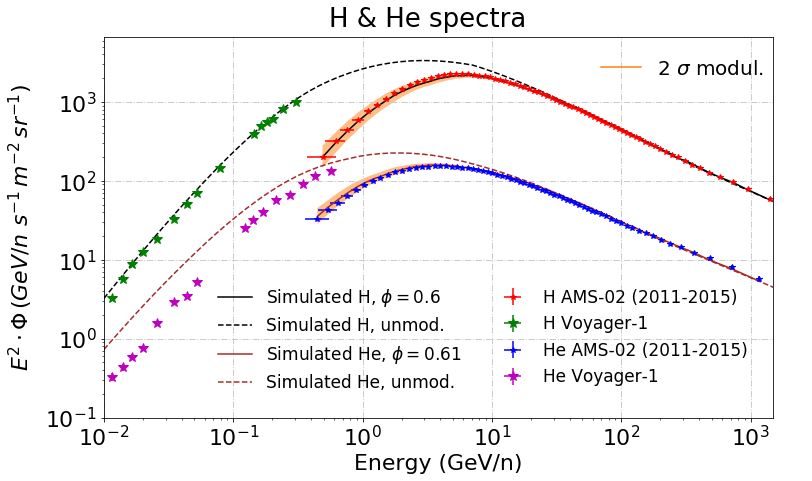

In [5]:
sloppe = 2.

fig1 = plt.figure(figsize=(12,7))
fig1.suptitle("H & He spectra", fontsize = 26, y=0.94)
plt.yscale('log')
plt.xscale('log')

plt.errorbar(Emeanp, fluxp*Emeanp**sloppe, yerr = [fluxp_low*Emeanp**2, fluxp_up*Emeanp**sloppe], xerr = [(Emeanp - Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], fmt='*r', label = r"H AMS-02 (2011-2015)") #Real data
plt.errorbar(EmeanVp, fluxVp*np.power(EmeanVp, sloppe), xerr = [(EmeanVp-EmeanVp_low)/EmeanVp, (EmeanVp_up-EmeanVp)/EmeanVp], yerr = [fluxVp_low*np.power(EmeanVp, sloppe), fluxVp_up*np.power(EmeanVp, sloppe)], fmt= '*g', label = r"H Voyager-1", markersize = 10.)
plt.errorbar(EmeanHe,fluxHe*EmeanHe**sloppe, xerr = [(EmeanHe - EmeanHe_low)/EmeanHe, (EmeanHe_up-EmeanHe)/EmeanHe], yerr = [fluxHe_low*EmeanHe**sloppe, fluxHe_up*EmeanHe**sloppe], fmt='*b', label = r"He AMS-02 (2011-2015)") #Real data
plt.errorbar(EmeanVHe, fluxVHe*np.power(EmeanVHe, sloppe), xerr = [(EmeanVHe-EmeanVHe_left)/EmeanVHe, (EmeanVHe_right-EmeanVHe)/EmeanVHe], yerr = (errfluxVHe/fluxVHe)**sloppe, fmt= '*m', label = r"He Voyager-1", markersize = 10.)

####### Protons #####
H1 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.011))
H2 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.011))
H3 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.011))
mod1 = (H1 + H2 + H3)
plt.plot(Emeanp, mod1*(Emeanp**sloppe), "k-", label = r"Simulated H, $\phi = {}$".format(str(phi_ams-0.01)))

H1_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.011+0.12))
H2_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.011+0.12))
H3_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.011+0.12))
mod1sup  = (H1_ + H2_ + H3_)*(Emeanp**sloppe)
H1_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.011-0.12))
H2_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.011-0.12))
H3_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.011-0.12))
mod1low  = (H1_ + H2_ + H3_)*Emeanp**(sloppe)
plt.fill_between(Emeanp, mod1sup, mod1low, facecolor='C1', alpha=0.5)#, label = r"2 $\sigma$ modul.")

mod0 = (np.array(table_H1)[0] + np.array(table_H2)[0] + np.array(table_H3)[0])*(E**sloppe)
plt.semilogx(E, mod0, "k", linestyle='dashed', label = "Simulated H, unmod.")


####### HELIUM #####
He3 = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He3)[0], 2, 3, phi_ams))
He4 = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He4)[0], 2, 4, phi_ams))
plt.plot(EmeanHe, (He4 + He3)*(EmeanHe**sloppe), "brown", linestyle='solid', label = r"Simulated He, $\phi = {}$".format(str(phi_ams)))

He3_ = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He3)[0], 2, 3, phi_ams+0.12))
He4_ = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He4)[0], 2, 4, phi_ams+0.12))
mod1supHe  = (He3_ + He4_)*(EmeanHe**sloppe)
He3_ = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He3)[0], 2, 3, phi_ams-0.12))
He4_ = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He4)[0], 2, 4, phi_ams-0.12))
mod1lowHe  = (He3_ + He4_)*(EmeanHe**sloppe)
plt.fill_between(EmeanHe, mod1supHe, mod1lowHe, facecolor='C1', alpha=0.5)

mod0He = (np.array(table_He3)[0] + np.array(table_He4)[0])*(E**sloppe)
plt.semilogx(E, mod0He, "brown", linestyle='dashed', label = "Simulated He, unmod.")


leg = fig1.legend(labels=[ "2 $\sigma$ modul."], ncol = 1, fontsize = 20, frameon = False, loc = (0.73, 0.82)) 
LH = leg.legendHandles
LH[0].set_color('C1')
plt.legend(prop={'size': 17}, frameon = False, ncol = 2, loc = 'lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel(r"$E^{2} \cdot \Phi \, (GeV$/$n  \,\,s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22, labelpad = 10)
plt.xlabel("Energy (GeV/n)", fontsize = 22)
plt.xlim(right = 1.5e3, left = 0.01)
plt.ylim(bottom = 1.e-1)
plt.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

#plt.savefig('C:/Users/pedro/OneDrive/Escritorio/pHe_spectrum_DRAGON2.png')
#plt.savefig('C:/Users/pedro/OneDrive/Escritorio/pHe_spectrum_DRAGON2.pdf')
plt.show()
plt.close()

# ANTIPROTONS DATA

In [8]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/pbar_AMS02_2018.txt' #Antip_AMS_2011-2015.dat'
Rmeana, Rmeana_left, Emeana_right = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxa, fluxa_low, fluxa_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)                
errfluxa = (fluxa_low + fluxa_up)/2
EmeanAp, yAp, errAp = CR.Rig_to_En(Rmeana, 1, 1, fluxa, (fluxa_low + fluxa_up)/2)

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/Antip_PAM_JETPlett2013.txt'
EmeanaP, EmeanaP_left, EmeanaP_right = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxaP, fluxaP_low, fluxaP_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxaP = (fluxaP_low + fluxaP_up)/2

# #### Aprot/prot DATA
print(r"\n $\hat{p}$/p \n")
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/pbar_p_AMS_PRL2018.txt'
RmeanApp, RminApp, RmaxApp = np.loadtxt(data,skiprows=2,usecols=(0,1,2),unpack=True)
fluxApp, fluxApp_low, fluxApp_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
EmeanApp, yApp, errApp = CR.Rig_to_En(RmeanApp, 1, 1, fluxApp, (fluxApp_low + fluxApp_up)/2)

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/pbar_p_PAM_JETPlett2013.txt'
EmeanrP, EminrP,EmaxrP = np.loadtxt(data,skiprows=2,usecols=(0,1,2),unpack=True)
fluxrP, fluxrP_low, fluxrP_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)

\n $\hat{p}$/p \n


\begin{equation}
Q_{CR+ISM\longrightarrow\bar{p}}(E_{\bar{p}}) = \sum_{CR}4 \pi~ n_{ISM} \int^{\infty}_0 dE \phi_{CR}(E)\frac{d\sigma_{CR+ISM\longrightarrow\bar{p}}}{dE_{\bar{p}}}(E, E_{\bar{p}}) ,
\label{eq:sec_AP_Sourceterm}
\end{equation}

Here, the key ingredients are the CR fluxes (H and He) and the $\bar{p}$ production cross sections.

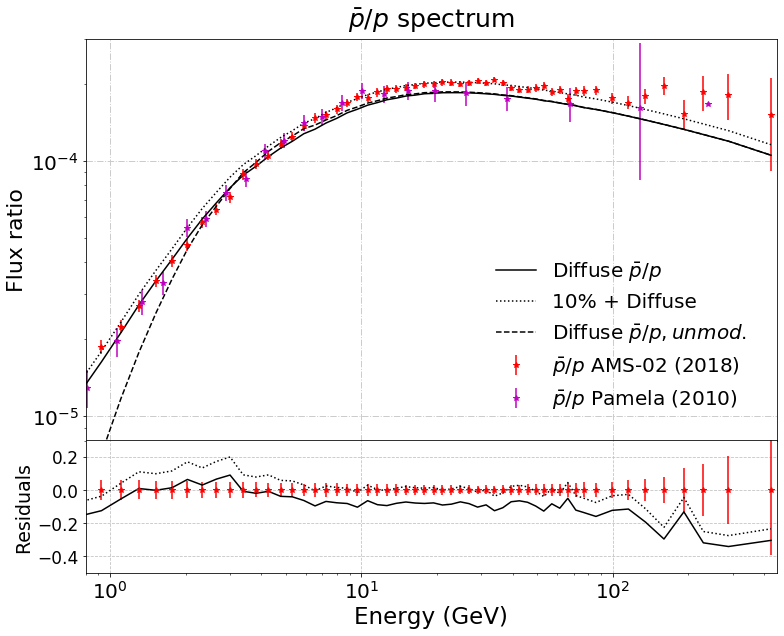

In [12]:
#PLOT
fig1 = plt.figure(figsize=(12., 9.))
fig1.suptitle(r'$\bar{p}/p$ spectrum', fontsize = 25, y = 0.97) #
#Plot Data and model
frame1=fig1.add_axes((.1,.3,.8,.62)) #xmin, ymin, dx, dy
plt.yscale('log')

frame1.errorbar(EmeanApp, yApp, yerr = errApp, fmt='*r', label = r"$\bar{p}/p$ AMS-02 (2018)") #Real data
frame1.errorbar(EmeanrP, fluxrP, yerr = [fluxrP_low, fluxrP_up], fmt='*m', label = r"$\bar{p}/p$ Pamela (2010)") #Real data


H1 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_App))
H2 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_App))
H3 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_App))
AP = np.interp(EmeanApp, E, CR.modul(E, np.array(table_Ap)[0], 1, 1, phi_App, Antip=True, phi_n = phi_neg))
modApp = (1./0.95)*AP/(H1 + H2 + H3)
plt.semilogx(EmeanApp, modApp, 'k', label =  r"Diffuse $\bar{p}/p$")

plt.semilogx(EmeanAp, 1.1*modApp, 'k:', label =  r"10% + Diffuse")

H1 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, 0))
H2 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, 0))
H3 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, 0))
AP = np.interp(EmeanApp, E, CR.modul(E, np.array(table_Ap)[0], 1, 1, 0, Antip=True, phi_n = 0))
mod0App = (1./0.95)*AP/(H1 + H2 + H3)
plt.semilogx(EmeanApp, mod0App, 'k', linestyle = 'dashed', label =  r"Diffuse $\bar{p}/p, unmod.$")

frame1.legend(prop={'size': 20}, frameon = False, loc = 0, fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 22)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)
frame1.set_ylim(bottom = 8e-6, top = 3e-4)
plt.xlim(left = 0.8, right = 450)


frame2 = fig1.add_axes((.1,.096,.8,.205))
plt.xscale('log')

frame2.errorbar(EmeanApp, np.zeros(len(EmeanApp)), yerr = errApp/yApp, fmt = "r*", label = "AMS-02 error-bars")

diff = np.array(modApp-yApp)
frame2.plot(EmeanApp, diff/yApp, "k")

diff = np.array(1.1*modApp-yApp)
frame2.plot(EmeanApp, diff/yApp, "k:")

frame2.set_ylim(top = 0.3, bottom = -0.5)
frame2.yaxis.set_tick_params(labelsize = 17)
plt.xlim(left = 0.8, right = 450)
frame2.xaxis.set_tick_params(labelsize = 20)

frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV)", fontsize = 23)

frame2.set_yticks([-0.4, -0.2, 0.0, 0.2])

#frame2.set_yticks([0.05, -0.05], minor=True)
#frame2.yaxis.grid(True, which='minor', color = 'chocolate', linestyle='-.', linewidth=1)
frame2.grid(color= '0.76', linestyle='dashed')#color='w', linestyle='solid')

#plt.legend(ncol = 2, loc = 0, frameon=True, borderpad=1) #1 is upper right
#plt.savefig('C:/Users/pedro/OneDrive/Escritorio/App_DRAGON2.png')
#plt.savefig('C:/Users/pedro/OneDrive/Escritorio/App_DRAGON2.pdf')
plt.show()
plt.close()



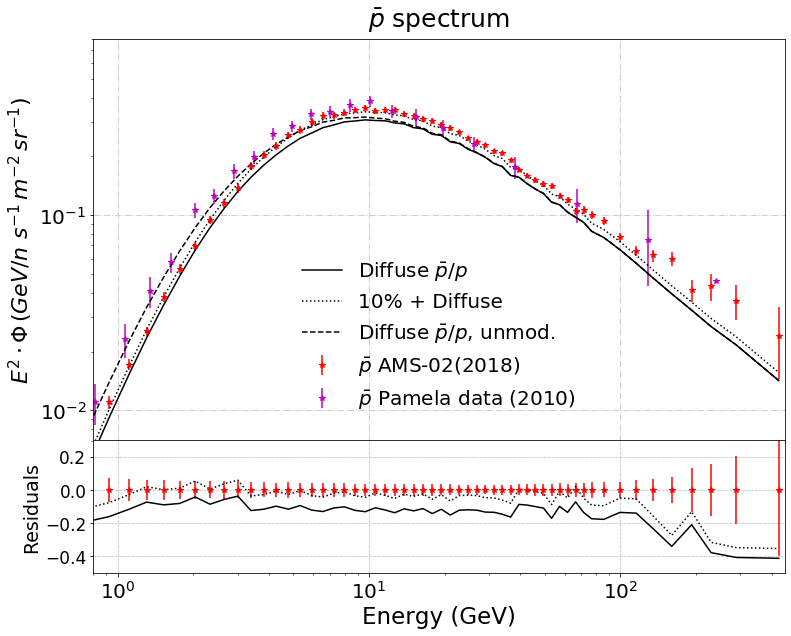

In [14]:
slopp = 2.

#PLOT
fig1 = plt.figure(figsize=(12., 9.))
fig1.suptitle(r'$\bar{p}$ spectrum', fontsize = 25, y = 0.97) #
#Plot Data and model
frame1=fig1.add_axes((.1,.3,.8,.62)) #xmin, ymin, dx, dy
plt.yscale('log')

frame1.errorbar(EmeanAp, yAp*EmeanAp**slopp, yerr = errAp*EmeanAp**slopp, fmt='*r', label = r"$\bar{p}$ AMS-02(2018)") #Real data
frame1.errorbar(EmeanaP, fluxaP*EmeanaP**slopp, yerr = [fluxaP_low*EmeanaP**slopp, fluxaP_up*EmeanaP**slopp], fmt='*m', label = r"$\bar{p}$ Pamela data (2010)") #Real data

modAp = np.interp(EmeanAp, E, CR.modul(E, np.array(table_Ap)[0], 1, 1, phi_App, Antip=True, phi_n = phi_neg))
plt.semilogx(EmeanAp, modAp*EmeanAp**slopp, 'k', label =  r"Diffuse $\bar{p}/p$")

plt.semilogx(EmeanAp, 1.1*modAp*EmeanAp**slopp, 'k:', label =  r"10% + Diffuse")

mod0Ap = np.interp(EmeanAp, E, CR.modul(E, np.array(table_Ap)[0], 1, 1, phi_App, Antip=True, phi_n = 0))
plt.semilogx(EmeanAp, mod0Ap*EmeanAp**slopp, 'k', linestyle = 'dashed', label =  r"Diffuse $\bar{p}/p$, unmod.")

frame1.legend(prop={'size': 20}, frameon = False, loc = 0, fancybox=True, framealpha=1, shadow=True, borderpad=1)

if slopp == 2.:
    plt.ylabel(r"$E^{2} \cdot \Phi \, (GeV$/$n  \,\,s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22)
else: 
    raise SystemExit("Change the label for this slopp value ({})".format(slopp))

frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)
frame1.set_ylim(bottom = 7e-3, top = 0.8)
plt.xlim(left = 0.8, right = 450)


frame2 = fig1.add_axes((.1,.096,.8,.205))
plt.xscale('log')

frame2.errorbar(EmeanAp, np.zeros(len(EmeanAp)), yerr = errAp/yAp, fmt = "r*", label = "AMS-02 error-bars")

diff = np.array(modAp-yAp)
frame2.plot(EmeanApp, diff/yAp, "k")

diff = np.array(1.1*modAp-yAp)
frame2.plot(EmeanApp, diff/yAp, "k:")


frame2.set_ylim(top = 0.3, bottom = -0.5)
frame2.yaxis.set_tick_params(labelsize = 17)
plt.xlim(left = 0.8, right = 450)
frame2.xaxis.set_tick_params(labelsize = 20)

frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV)", fontsize = 23)

frame2.set_yticks([-0.4, -0.2, 0.0, 0.2])

#frame2.set_yticks([0.05, -0.05], minor=True)
#frame2.yaxis.grid(True, which='minor', color = 'chocolate', linestyle='-.', linewidth=1)
frame2.grid(color= '0.76', linestyle='dashed')#color='w', linestyle='solid')

#plt.legend(ncol = 2, loc = 0, frameon=True, borderpad=1) #1 is upper right
#plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Ap_DRAGON2.png')
#plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Ap_DRAGON2.pdf')
plt.show()
plt.close()

